In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import pickle
from copy import deepcopy
from read.read_functions import *
from read.pickle_functions import *
from create_all_users import create_all_users
from create_rating_statistic import create_ratings_stat

pd.set_option('display.max_columns',40)
%load_ext autoreload
%autoreload 2

In [2]:
beer_advocate_path = '../datas/BeerAdvocate/pickle/'
matched_beer_data_path = '../datas/matched_beer_data/pickle'
rate_beer_path = '../datas/RateBeer/pickle'

merge_path='../datas/results'

In [3]:
with open(merge_path+"/df_ratings_stat.pkl", "rb") as f:
    df_ratings_stat = pickle.load(f)

In [4]:
df_ratings_merge=df_ratings_stat

In [5]:
df_ratings_merge["date"]=pd.to_datetime(df_ratings_merge["date"],unit="s")
df_ratings_merge["year"]=df_ratings_merge["date"].dt.year

C:\Users\Alexi\AppData\Local\Temp\ipykernel_17012\1690702322.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_ratings_merge["date"]=pd.to_datetime(df_ratings_merge["date"],unit="s")


In [6]:
with open(merge_path+"/df_ratings_stat_sampled.pkl", "rb") as f:
    df_ratings_sample = pickle.load(f)

In [7]:
df_ratings_sample["date"]=pd.to_datetime(df_ratings_sample["date"],unit="s")
df_ratings_sample["year"]=df_ratings_sample["date"].dt.year

C:\Users\Alexi\AppData\Local\Temp\ipykernel_17012\4141518223.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_ratings_sample["date"]=pd.to_datetime(df_ratings_sample["date"],unit="s")


In [12]:
df_ratings_sample.head(4)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,ba_user_name,user_id,appearance,aroma,palate,taste,overall,rating,rb_user_name,location,joined
349985,Spezial Rauchbier Lager,11058,Brauerei Spezial,2040,Smoked,4.9,1377597600,NaN,130058,3.0,3.0,3.0,7.0,10.0,2.60,Benzai,Netherlands,2011-06-13 10:00:00
7290066,Hop Sun (Summer Wheat Beer),17497,Southern Tier Brewing Company,3818,American Pale Wheat Ale,5.1,1339236000,chrisbokmuller,chrisbokmuller.620067,NaN,NaN,NaN,NaN,NaN,4.00,NaN,"United States, Michigan",2011-09-11 10:00:00
116380,Wacko,48190,Magic Hat Brewing Company,96,Fruit / Vegetable Beer,4.5,1246096800,zeff80,zeff80.63854,2.5,3.0,3.5,3.0,3.5,3.12,NaN,"United States, Missouri",2006-02-06 11:00:00
4217688,Bad Axe,93499,Big Wood Brewery,27074,American Double / Imperial IPA,9.8,1368698400,FreshmanPour77,freshmanpour77.352806,NaN,NaN,NaN,NaN,NaN,4.50,NaN,"United States, Minnesota",2009-07-25 10:00:00


In [8]:
with open(merge_path+'/df_all_users.pkl', 'rb') as f:
    df_all_users = pickle.load(f)

In [5]:
#Define list of datas for each website
datas_matched_beer_names = ['df_matched_beer_beers','df_matched_beer_breweries','df_matched_beer_ratings_ba','df_matched_beer_ratings_rb','df_matched_beer_ratings','df_matched_beer_users_approx','df_matched_beer_users']
datas_advocate_names = ['df_advocate_beers','df_advocate_breweries','df_advocate_ratings','df_advocate_reviews','df_advocate_users']
datas_rate_beer_names = ['df_rate_beer_beers','df_rate_beer_breweries','df_rate_beer_users','df_rate_beer_ratings','df_rate_beer_ratings']

### Import datas stored as pickle

In [6]:
df_matched_beer_beers,df_matched_beer_breweries,df_matched_beer_ratings_ba,df_matched_beer_ratings_rb,df_matched_beer_ratings,df_matched_beer_users_approx,df_matched_beer_users = load_datas('matched_beer_data', datas_matched_beer_names)
df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users,df_rate_beer_ratings,df_rate_beer_reviews = load_datas('RateBeer', datas_rate_beer_names)
df_advocate_beers,df_advocate_breweries,df_advocate_ratings,df_advocate_reviews,df_advocate_users = load_datas('BeerAdvocate', datas_advocate_names)

Loading df_matched_beer_beers...
Loading df_matched_beer_breweries...
Loading df_matched_beer_ratings_ba...
Loading df_matched_beer_ratings_rb...
Loading df_matched_beer_ratings...
Loading df_matched_beer_users_approx...
Loading df_matched_beer_users...
Loading df_rate_beer_beers...
Loading df_rate_beer_breweries...
Loading df_rate_beer_users...
Loading df_rate_beer_ratings...
Loading df_rate_beer_ratings...
Loading df_advocate_beers...
Loading df_advocate_breweries...
Loading df_advocate_ratings...
Loading df_advocate_reviews...
Loading df_advocate_users...


#### Cleaning

In [8]:
from cleaning_functions.matched_beer import *
from cleaning_functions.rate_beer import *
from cleaning_functions.advocate import *

In [9]:
mb_users = deepcopy(df_matched_beer_users)
users, mb_users_index = clean_mb_users(mb_users)
advocate_users = deepcopy(df_advocate_users)
advocate_users = clean_advocate_users(advocate_users)
rb_users = deepcopy(df_rate_beer_users)
rb_users = clean_rb_users(rb_users)

#### Merge

In [11]:
df_all_users = create_all_users(advocate_users,mb_users,rb_users)
df_ratings_merge = create_ratings_stat(df_advocate_ratings,df_rate_beer_ratings, df_all_users)

Creating copies...
processing dataframes...
Merging dataframes...
Concatenating dataframes...


c:\Users\asemiz\ada\ada-2023-project-remontada\code\create_rating_statistic.py:47: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  ratings_stats["date"]=pd.to_datetime(ratings_stats["date"],unit="s")


### Number of ratings per user

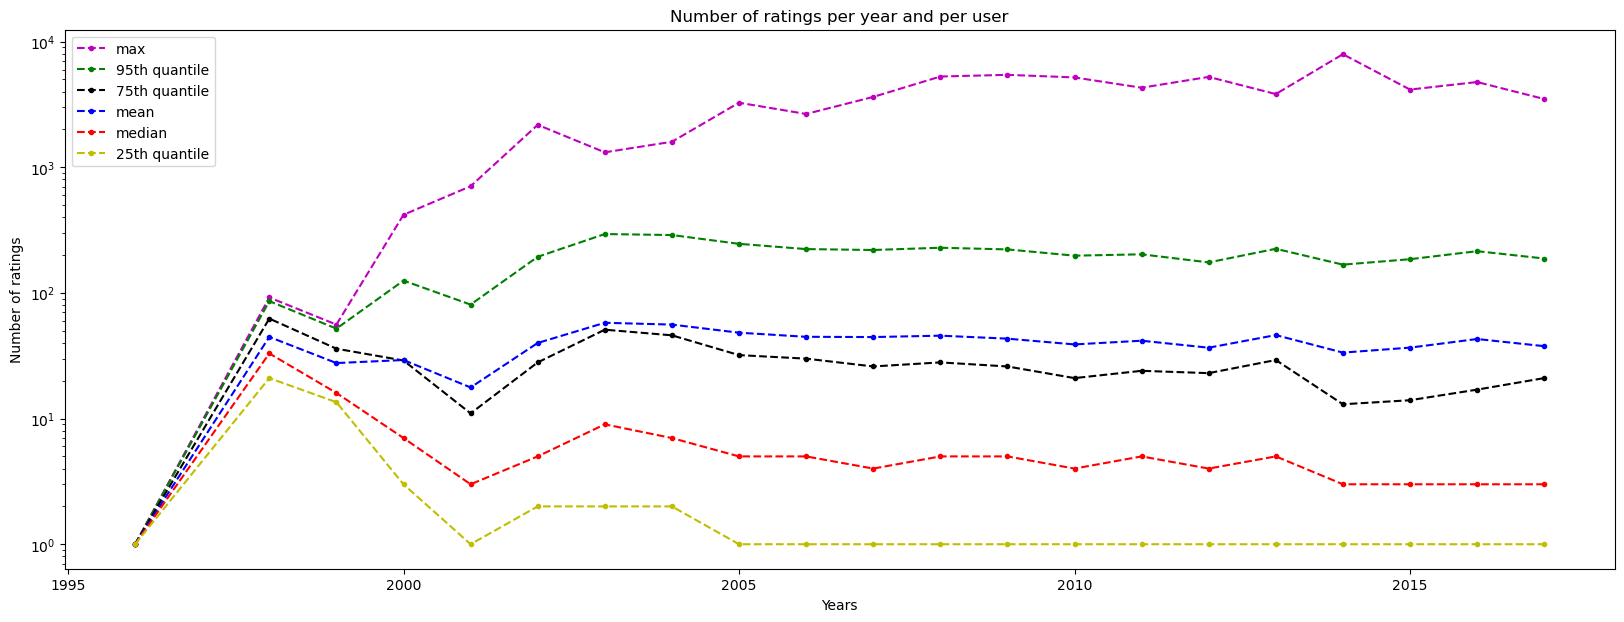

In [12]:

mean_nbr_ratings_over_years=[]
median_nbr_ratings_over_years=[]
max_nbr_ratings_over_years=[]
quantile_5_nbr_ratings_over_years=[]
quantile_25_nbr_ratings_over_years=[]
quantile_75_nbr_ratings_over_years=[]


nbr_ratings_per_year_and_user=df_ratings_merge.groupby(["user_id","year"]).agg("size").reset_index()
years=np.sort(nbr_ratings_per_year_and_user.year.unique())
nbr_ratings_per_year_and_user=df_ratings_merge.groupby(["user_id","year"]).agg("size")

for a_year in years:
    mean_nbr_ratings_over_years.append(nbr_ratings_per_year_and_user[:,a_year].mean())
    median_nbr_ratings_over_years.append(nbr_ratings_per_year_and_user[:,a_year].median())
    quantile_5_nbr_ratings_over_years.append(nbr_ratings_per_year_and_user[:,a_year].quantile(0.95))
    quantile_25_nbr_ratings_over_years.append(nbr_ratings_per_year_and_user[:,a_year].quantile(0.25))
    quantile_75_nbr_ratings_over_years.append(nbr_ratings_per_year_and_user[:,a_year].quantile(0.75))
    max_nbr_ratings_over_years.append(nbr_ratings_per_year_and_user[:,a_year].max())
        
# Plot the results
plt.figure(figsize=(20,7))
markersize=3
plt.plot(years, max_nbr_ratings_over_years, label="max", c="m", linestyle="--", marker='o', markersize=markersize)
plt.plot(years, quantile_5_nbr_ratings_over_years, label="95th quantile", c="g", linestyle="--", marker='o', markersize=markersize)
plt.plot(years, quantile_75_nbr_ratings_over_years, label="75th quantile", c="k", linestyle="--", marker='o', markersize=markersize)
plt.plot(years, mean_nbr_ratings_over_years, label="mean", c="b", linestyle="--", marker='o', markersize=markersize)
plt.plot(years, median_nbr_ratings_over_years, label="median", c="r", linestyle="--", marker='o', markersize=markersize)
plt.plot(years, quantile_25_nbr_ratings_over_years, label="25th quantile", c="y", linestyle="--", marker='o', markersize=markersize)
plt.legend()
plt.yscale("log")
plt.ylabel("Number of ratings")
plt.xlabel("Years")
plt.title("Number of ratings per year and per user")
plt.show()
    

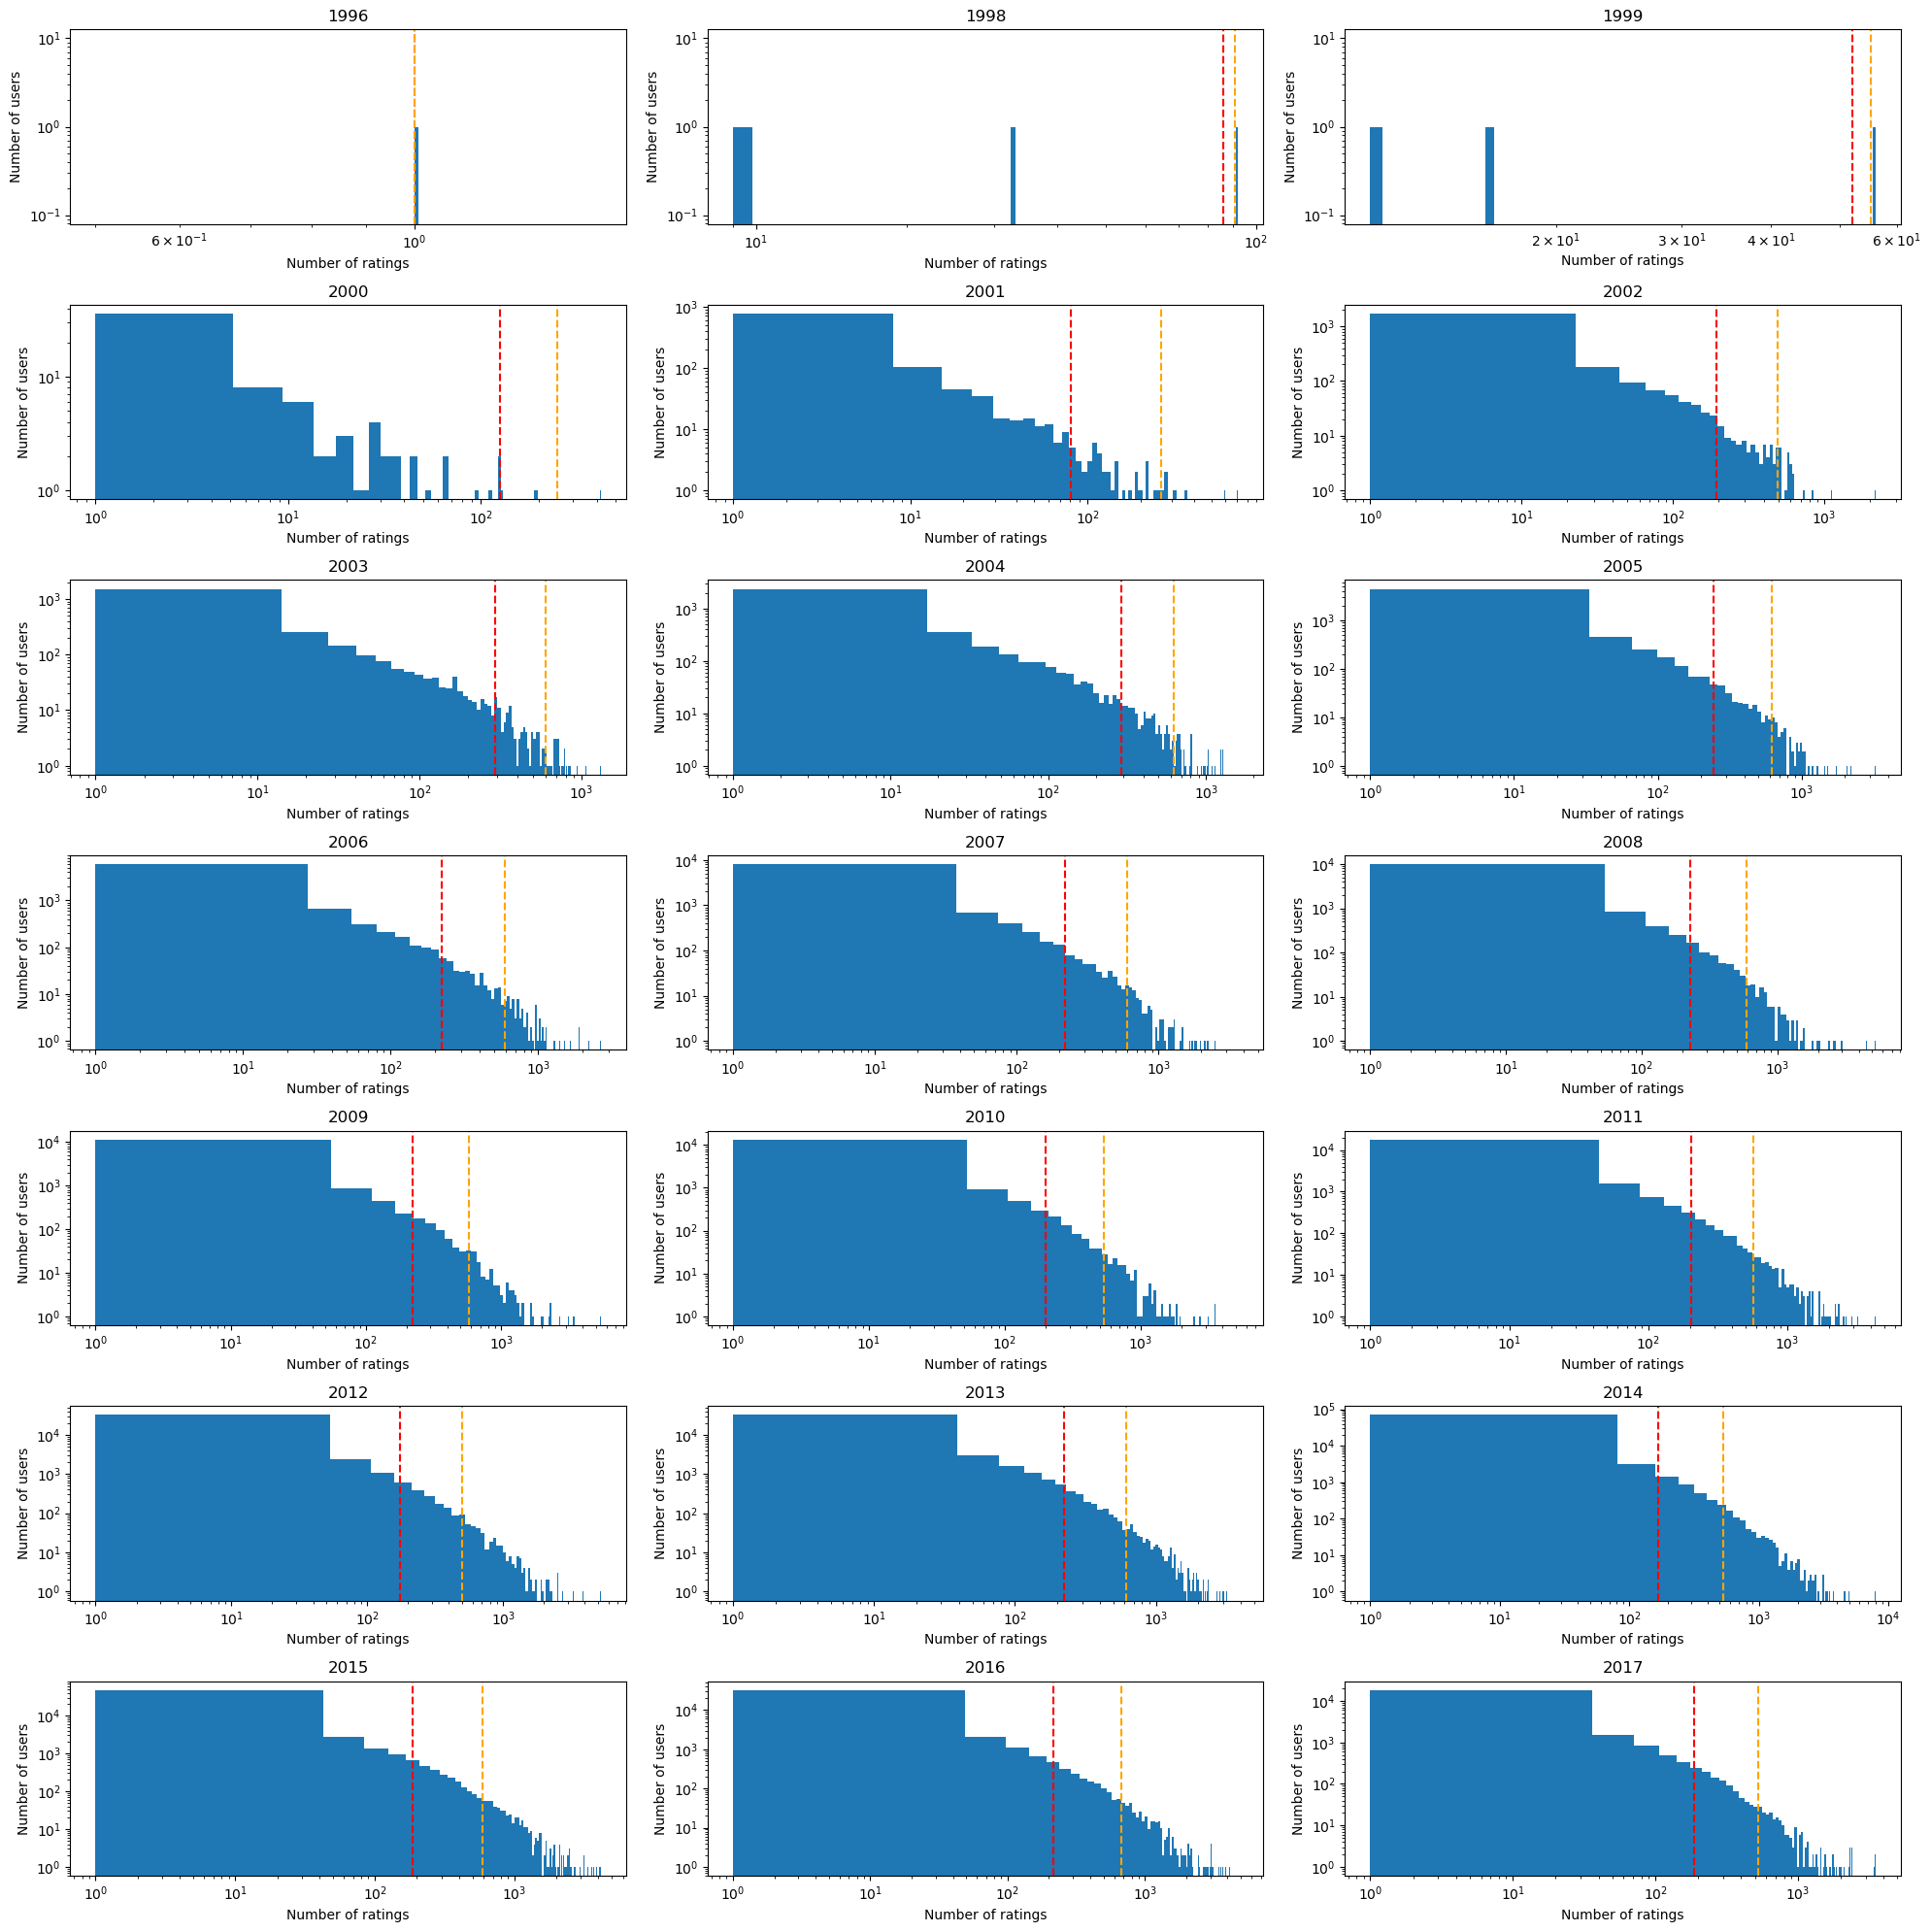

In [13]:
# Now we plot the distribution of the number of ratings per user every year
fig,ax=plt.subplots(len(years)//3,3)
fig.set_size_inches(20,20)
for i,a_year in enumerate(years):
    ax[i//3,i%3].hist(nbr_ratings_per_year_and_user[:,a_year],bins=100,log=True)
    ax[i//3,i%3].axvline(nbr_ratings_per_year_and_user[:,a_year].quantile(0.95),c="r",linestyle="--")
    ax[i//3,i%3].axvline(nbr_ratings_per_year_and_user[:,a_year].quantile(0.99),c="orange",linestyle="--")

    ax[i//3,i%3].set_title(str(a_year))
    ax[i//3,i%3].set_xscale("log")
    ax[i//3,i%3].set_xlabel("Number of ratings")
    ax[i//3,i%3].set_ylabel("Number of users")
fig.tight_layout()
plt.show()

#### Now we need to add the cumulative number of ratings over the years for every beer

In [14]:
sample_merge_ratings=df_ratings_merge.sample(100000,random_state=42)

In [15]:
df_grouped_beer_year=df_ratings_merge.groupby(["beer_id","year"]).agg("size")

In [16]:
sample_merge_ratings["nbr_ratings_beer_year-1"]=sample_merge_ratings[["beer_id","year"]].apply(lambda x: df_grouped_beer_year[str(x["beer_id"])][x["year"]-1] 
                                                if (x["year"]-1 in df_grouped_beer_year[str(x["beer_id"])])  else 0,axis=1)

In [17]:
run_on_whole_ratings=False #might be long
if run_on_whole_ratings:
    df_ratings_merge["nbr_ratings_beer_year-1"]=df_ratings_merge[["beer_id","year"]].apply(lambda x: df_grouped_beer_year[str(x["beer_id"])][x["year"]-1] 
                                                    if (x["year"]-1 in df_grouped_beer_year[str(x["beer_id"])])  else 0,axis=1)

### Add experts column

In [142]:
from compute_experts import compute_experts_table,filter_year_and_add_is_expert

In [104]:
experts_table_all=compute_experts_table(df_ratings_merge,quantile_score_expert=0.995)

In [106]:
experts_table=experts_table_all[0]

### Analyse a year (2016 for instance)

In [42]:
df_ratings_this_year,experts_this_year=filter_year_and_add_is_expert(df_ratings_merge,2016,experts_table)

c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


In [43]:
sample_df_ratings_this_year,experts_this_yearrr=filter_year_and_add_is_expert(sample_merge_ratings,2016,experts_table)

c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


## Part 1.c)

In [49]:
len(experts_this_year)

20

In [45]:
nbr_ratings_year_minus1_experts=sample_df_ratings_this_year.loc[sample_df_ratings_this_year["is_expert"]==1]["nbr_ratings_beer_year-1"]
nbr_ratings_year_minus1_non_experts=sample_df_ratings_this_year.loc[sample_df_ratings_this_year["is_expert"]==0]["nbr_ratings_beer_year-1"]


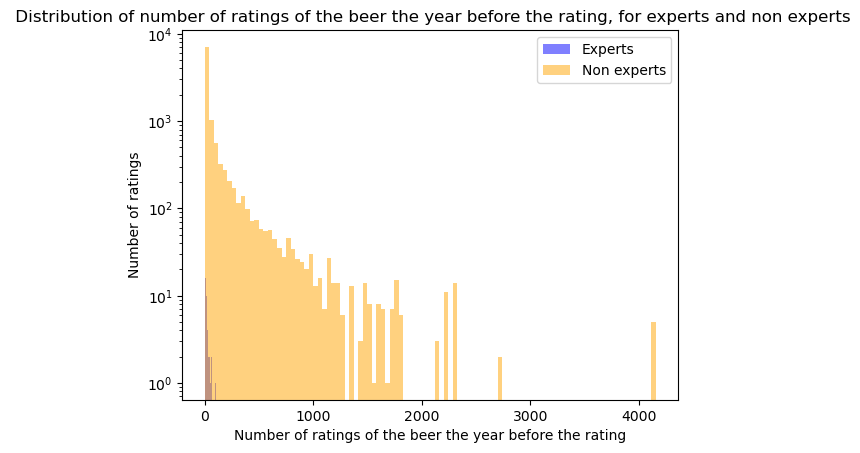

In [46]:
plt.hist(nbr_ratings_year_minus1_experts,bins=100,log=True,alpha=0.5,color="b",label="Experts")
plt.hist(nbr_ratings_year_minus1_non_experts,bins=100,log=True,alpha=0.5,color="orange",label="Non experts")
plt.legend()
plt.xlabel("Number of ratings of the beer the year before the rating")
plt.ylabel("Number of ratings")
plt.title(" Distribution of number of ratings of the beer the year before the rating, for experts and non experts")
plt.show()

In [47]:
ttest_ind(nbr_ratings_year_minus1_experts,nbr_ratings_year_minus1_non_experts)

TtestResult(statistic=-7.803305511955032, pvalue=6.565234210730447e-15, df=11229.0)

NOw goruped by user

In [50]:
mean_nbr_ratings_years_minus_one_per_user=sample_df_ratings_this_year.groupby(["user_id","is_expert"])["nbr_ratings_beer_year-1"].agg("mean").reset_index().set_index("user_id")

In [51]:
mean_nbr_ratings_years_minus_one_per_user_experts=mean_nbr_ratings_years_minus_one_per_user.loc[mean_nbr_ratings_years_minus_one_per_user["is_expert"]==1]["nbr_ratings_beer_year-1"]
mean_nbr_ratings_years_minus_one_per_user_non_experts=mean_nbr_ratings_years_minus_one_per_user.loc[mean_nbr_ratings_years_minus_one_per_user["is_expert"]==0]["nbr_ratings_beer_year-1"]

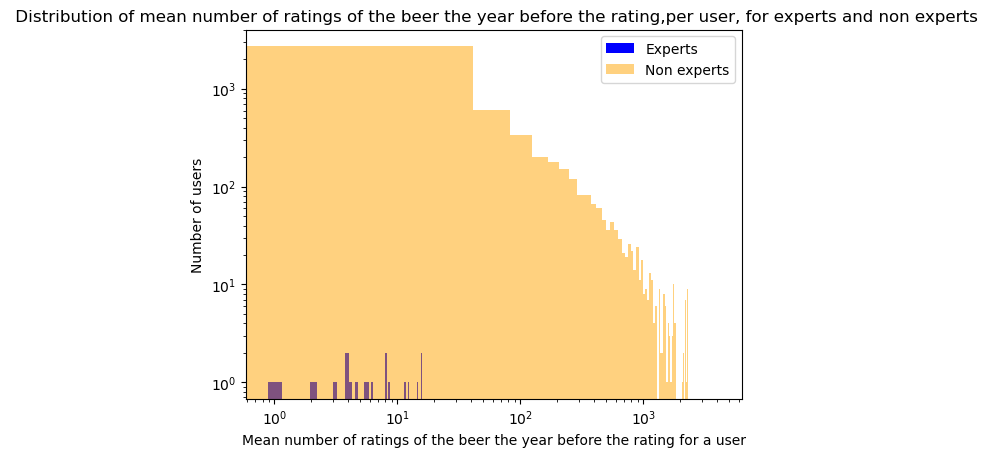

In [57]:
plt.hist(mean_nbr_ratings_years_minus_one_per_user_experts,bins=100,log=True,alpha=1,color="b",label="Experts")
plt.hist(mean_nbr_ratings_years_minus_one_per_user_non_experts,bins=100,log=True,alpha=0.5,color="orange",label="Non experts")
plt.legend()
plt.xscale("log")
plt.xlabel("Mean number of ratings of the beer the year before the rating for a user")
plt.ylabel("Number of users")
plt.title(" Distribution of mean number of ratings of the beer the year before the rating,per user, for experts and non experts")
plt.show()

In [ ]:
ttest_ind(mean_nbr_ratings_years_minus_one_per_user_experts,mean_nbr_ratings_years_minus_one_per_user_non_experts)

#### Now let's analyse how their ratings differentiate

In [58]:
minimum_number_of_ratings=100
YEAR=2017
absolute_difference_ratings=[]

df_ratings_this_year,experts_id=filter_year_and_add_is_expert(df_ratings_merge,YEAR,experts_table)
beers_with_enough_ratings=df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>minimum_number_of_ratings].index.values
df_advocate_ratings_this_year_with_enough_ratings=df_ratings_this_year.loc[df_ratings_this_year["beer_id"].isin(beers_with_enough_ratings)]
difference_ratings_medians=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("median")

for beer_id in difference_ratings_medians.index.get_level_values(0).unique():
    if 0 in difference_ratings_medians.loc[beer_id] and 1 in difference_ratings_medians.loc[beer_id]:
        absolute_difference_ratings.append(np.abs(difference_ratings_medians.loc[beer_id,0]-difference_ratings_medians.loc[beer_id,1]))


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


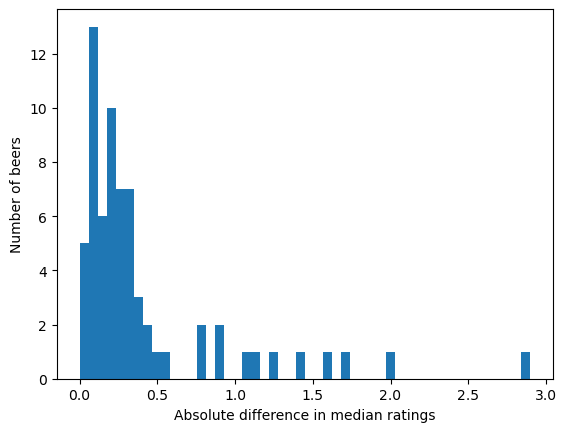

In [59]:
plt.hist(absolute_difference_ratings,bins=50)
plt.xlabel("Absolute difference in median ratings")
plt.ylabel("Number of beers")
plt.show()

In [64]:
#df_ratings_merge["rating"]=df_ratings_merge["rating"].astype(float)

In [65]:
YEAR=2015
df_ratings_this_year,experts_id=filter_year_and_add_is_expert(df_ratings_merge,YEAR,experts_table)


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


50
100
150
200
250
300
350
400
450


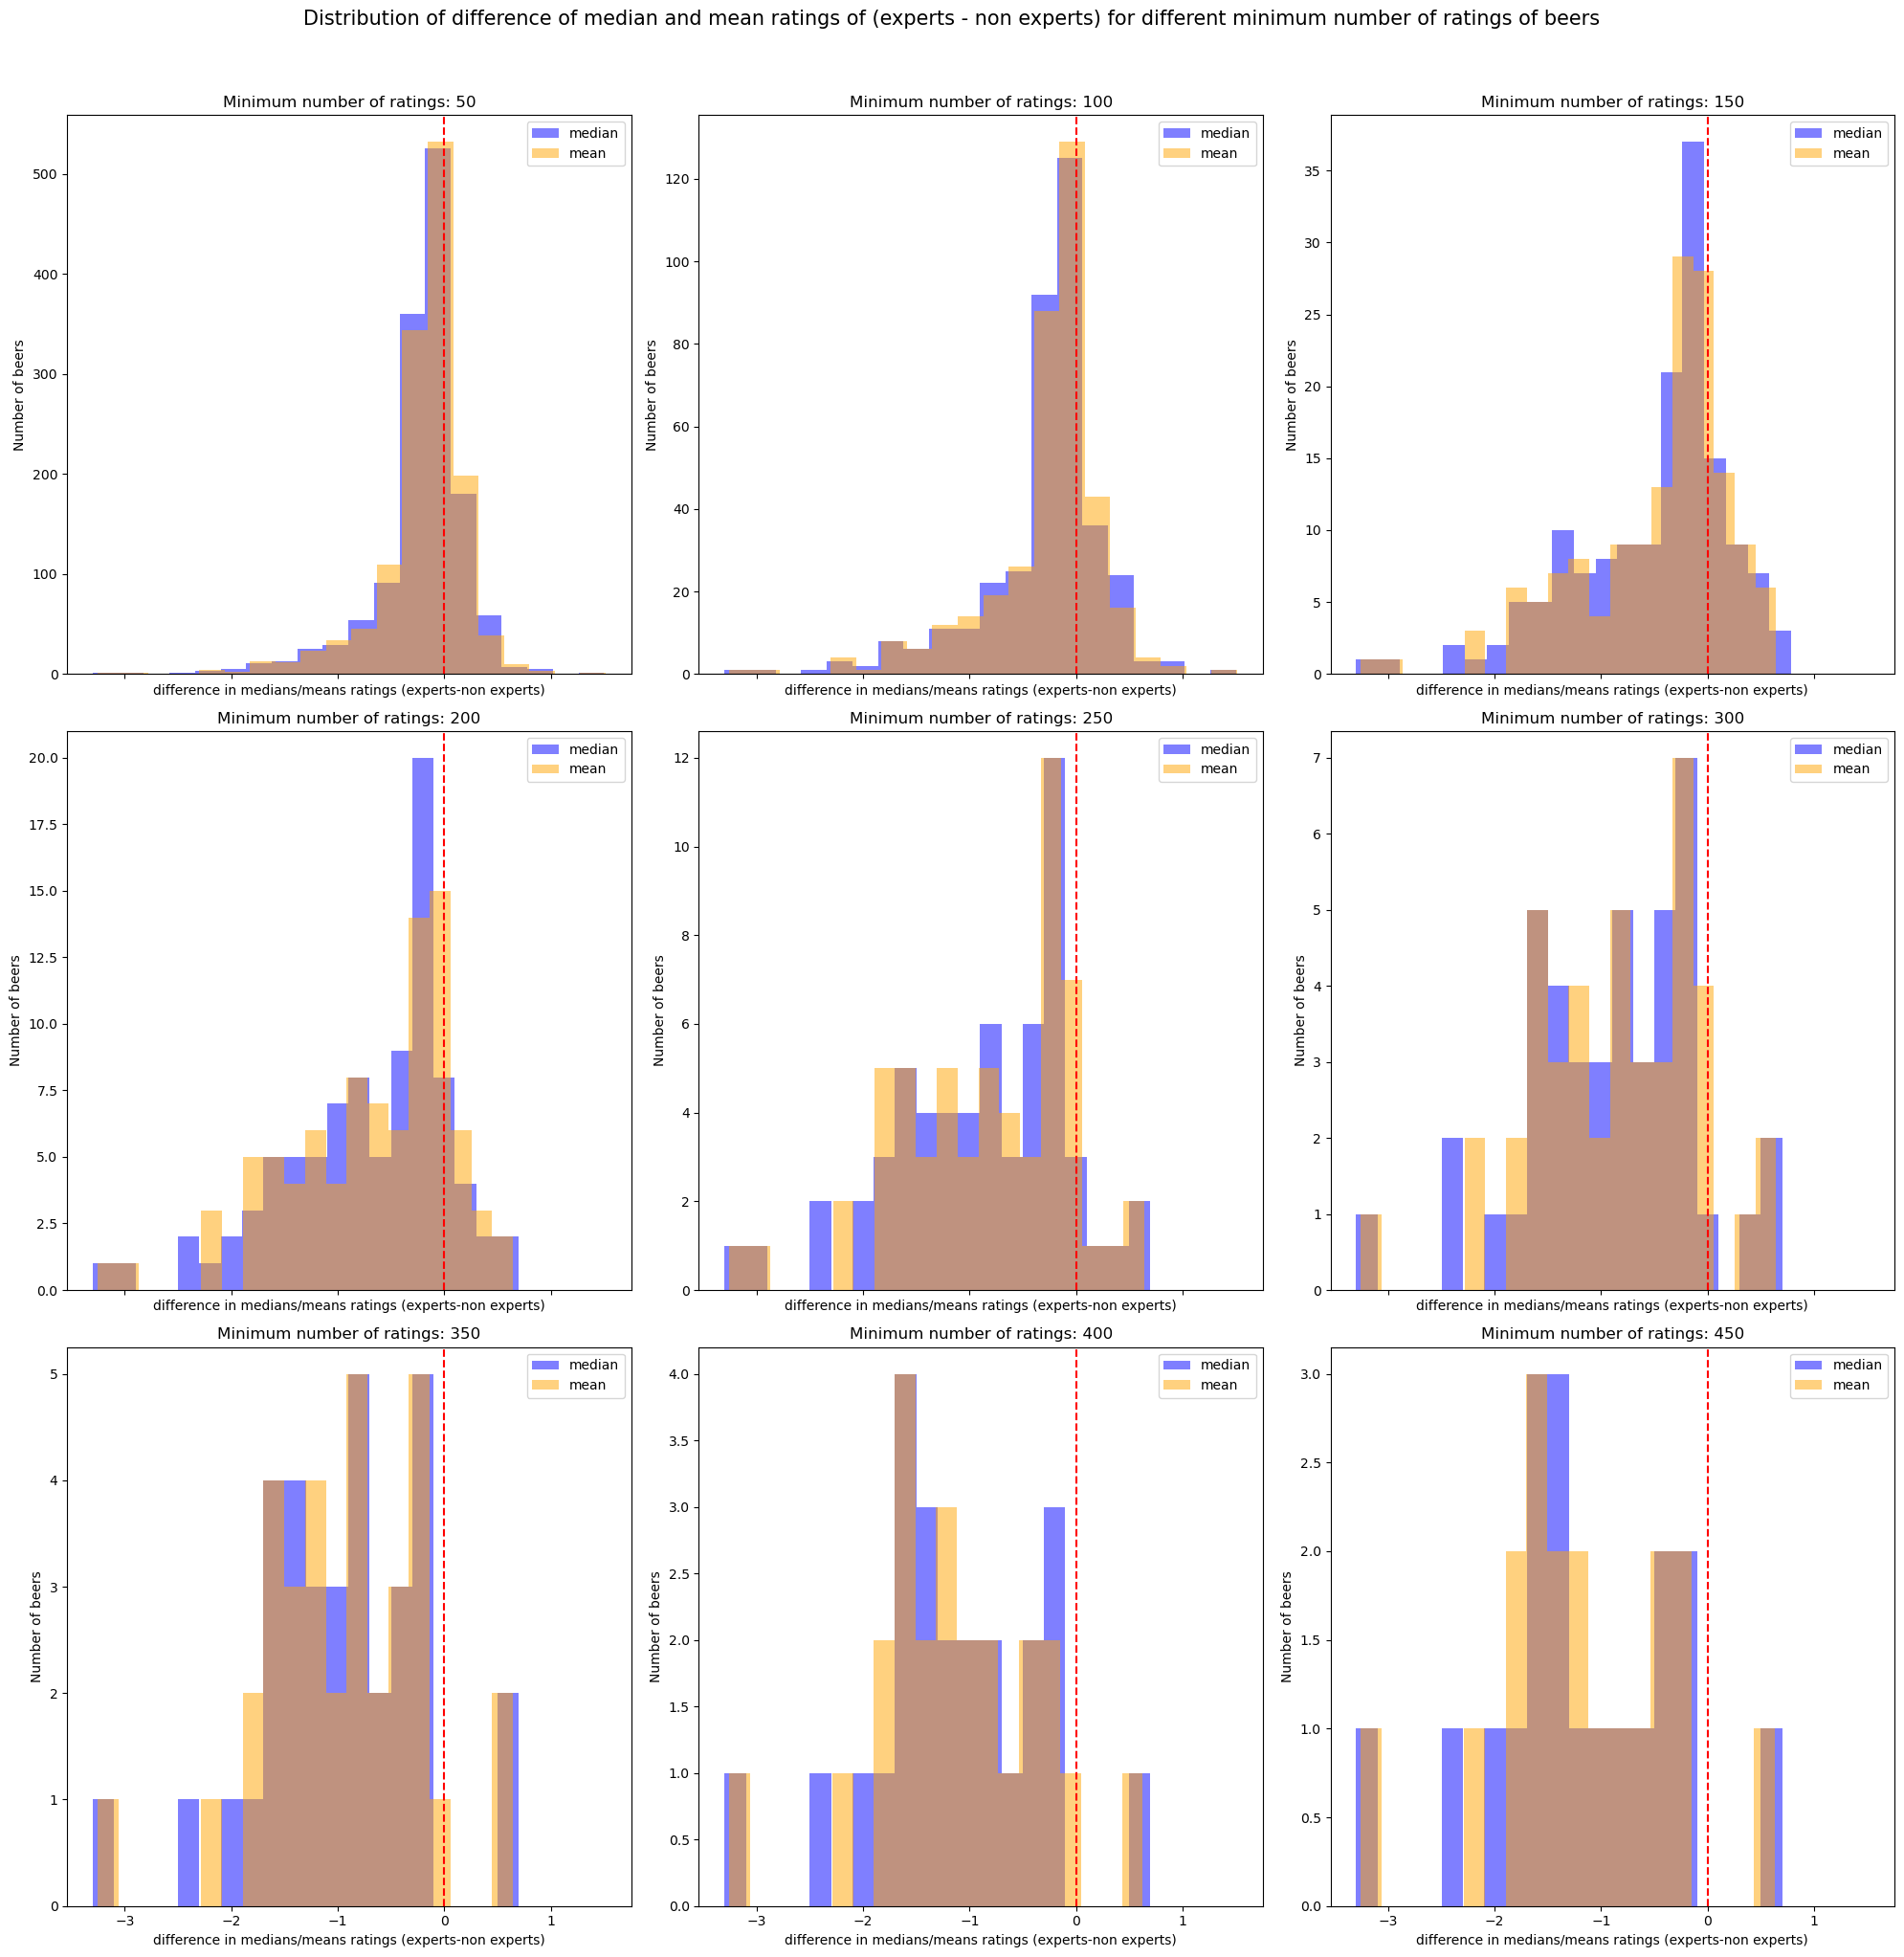

In [66]:
fig,ax=plt.subplots(int(np.ceil(len(np.arange(50,500,50))/3)),3,sharex=True)
fig.set_size_inches(20,20)
nb_bins=20

for i,minimum_number_of_ratings in enumerate(np.arange(50,500,50)):
    print(minimum_number_of_ratings)
    difference_ratings_medians_list=[]
    difference_ratings_means_list=[]
    beers_with_enough_ratings=df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>minimum_number_of_ratings].index.values
    df_advocate_ratings_this_year_with_enough_ratings=df_ratings_this_year.loc[df_ratings_this_year["beer_id"].isin(beers_with_enough_ratings)]
    difference_ratings_medians=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("median")
    difference_ratings_means=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("mean")
    
    for beer_id in difference_ratings_medians.index.get_level_values(0).unique():
        if 0 in difference_ratings_medians.loc[beer_id] and 1 in difference_ratings_medians.loc[beer_id]:
            difference_ratings_medians_list.append(difference_ratings_medians.loc[beer_id,1]-difference_ratings_medians.loc[beer_id,0])
            difference_ratings_means_list.append(difference_ratings_means.loc[beer_id,1]-difference_ratings_means.loc[beer_id,0])
    if i==0:
        difference_means_to_test=difference_ratings_means_list.copy()
    ax[i//3,i%3].hist(difference_ratings_medians_list,alpha=0.5,bins=nb_bins,color="b",label="median")
    ax[i//3,i%3].hist(difference_ratings_means_list,alpha=0.5,bins=nb_bins,color="orange",label="mean")
    ax[i//3,i%3].axvline(0,c="r",linestyle="--")
    ax[i//3,i%3].set_xlabel("difference in medians/means ratings (experts-non experts)")
    ax[i//3,i%3].set_ylabel("Number of beers")
    ax[i//3,i%3].set_title("Minimum number of ratings: "+str(minimum_number_of_ratings))
    ax[i//3,i%3].legend()
fig.suptitle("Distribution of difference of median and mean ratings of (experts - non experts) for different minimum number of ratings of beers",fontsize=15,y=1.02)
fig.tight_layout()
plt.show()

Now plot over the years

2006


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2007


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2008


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2009


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2010


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2011


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2012


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2013


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2014


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2015


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2016


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2017


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


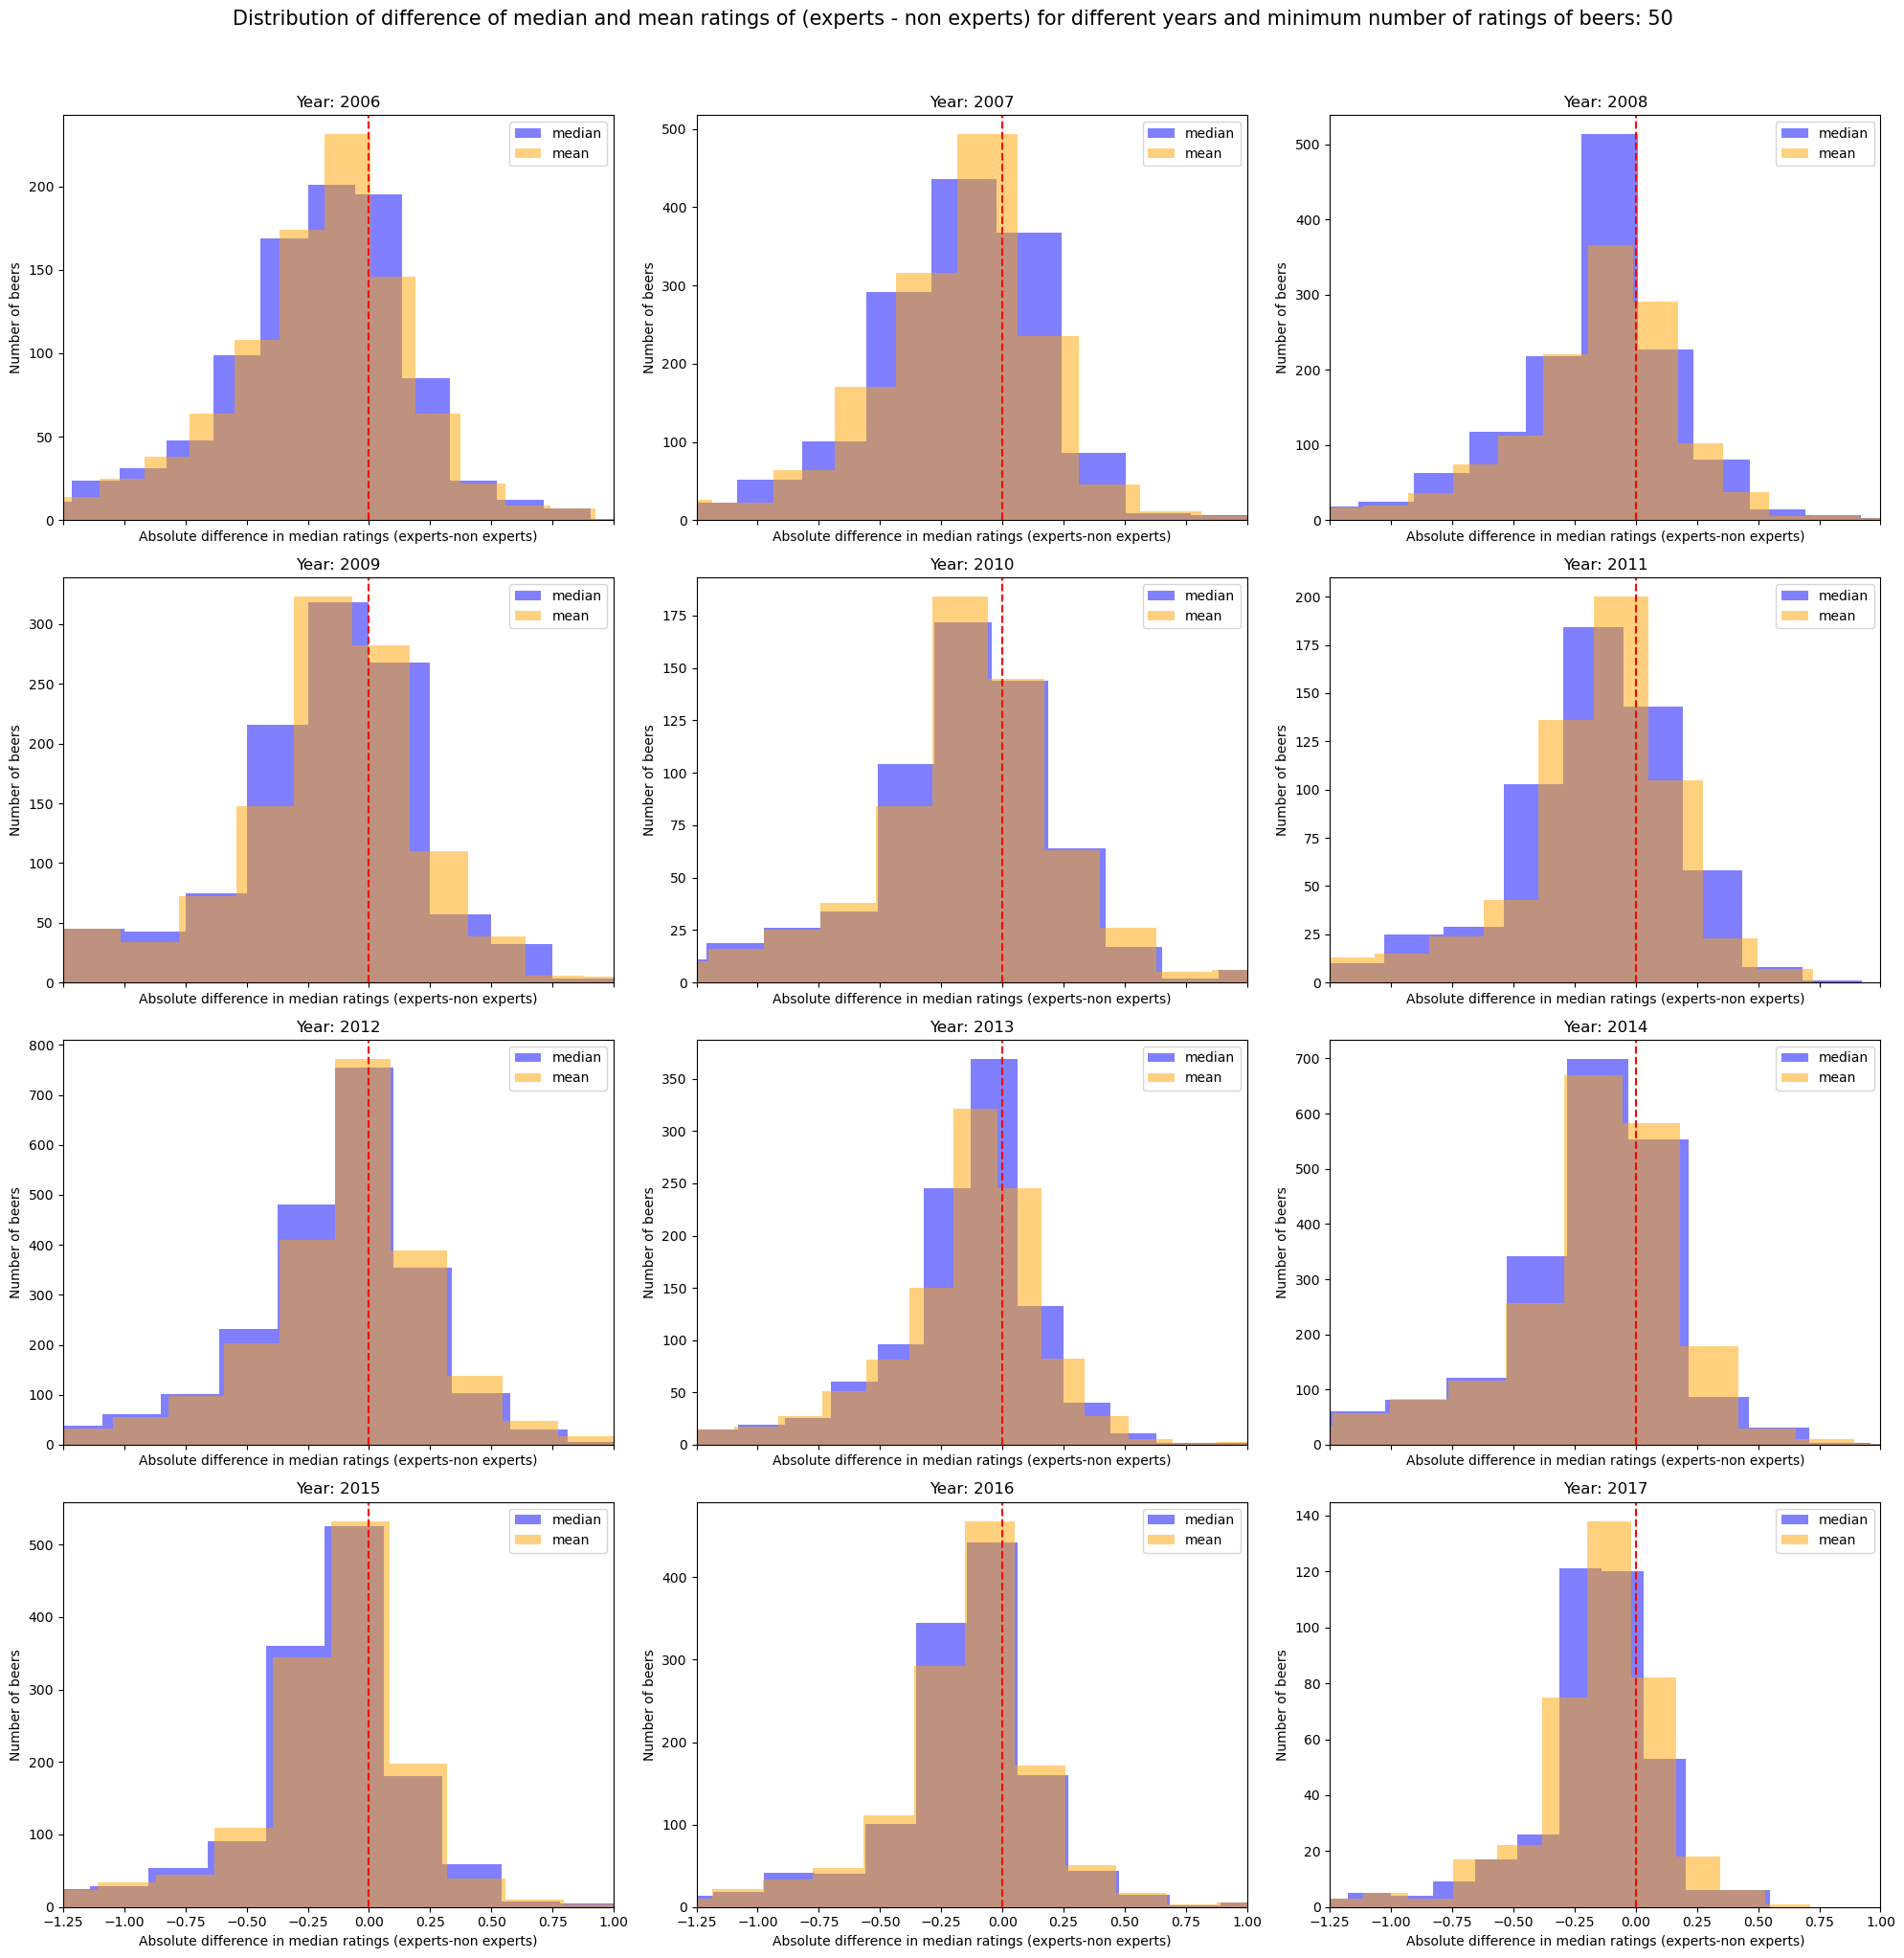

In [67]:
fig,ax=plt.subplots(4,3,sharex=True)
fig.set_size_inches(20,20)
nb_bins=20
min_number_of_ratings=50

for i,YEAR in enumerate(range(2006,2018)):
    print(YEAR)
    difference_ratings_medians_list=[]
    difference_ratings_means_list=[]
    df_ratings_this_year,experts_id=filter_year_and_add_is_expert(df_ratings_merge,YEAR,experts_table)
    beers_with_enough_ratings=df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>min_number_of_ratings].index.values
    df_advocate_ratings_this_year_with_enough_ratings=df_ratings_this_year.loc[df_ratings_this_year["beer_id"].isin(beers_with_enough_ratings)]
    difference_ratings_medians=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("median")
    difference_ratings_means=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("mean")
    
    for beer_id in difference_ratings_medians.index.get_level_values(0).unique():
        if 0 in difference_ratings_medians.loc[beer_id] and 1 in difference_ratings_medians.loc[beer_id]:
            difference_ratings_medians_list.append(difference_ratings_medians.loc[beer_id,1]-difference_ratings_medians.loc[beer_id,0])
            difference_ratings_means_list.append(difference_ratings_means.loc[beer_id,1]-difference_ratings_means.loc[beer_id,0])
            
    ax[i//3,i%3].hist(difference_ratings_medians_list,alpha=0.5,bins=nb_bins,color="b",label="median")
    ax[i//3,i%3].hist(difference_ratings_means_list,alpha=0.5,bins=nb_bins,color="orange",label="mean")
    ax[i//3,i%3].axvline(0,c="r",linestyle="--")
    ax[i//3,i%3].set_xlim(-1.25,1)
    ax[i//3,i%3].set_xlabel("Difference in median ratings (experts-non experts)")
    ax[i//3,i%3].set_ylabel("Number of beers")
    ax[i//3,i%3].set_title("Year: "+str(YEAR))
    ax[i//3,i%3].legend()
fig.suptitle(f"Distribution of difference of median and mean ratings of (experts - non experts) for different years and minimum number of ratings of beers: {min_number_of_ratings}",fontsize=15,y=1.02)
fig.tight_layout()
plt.show()


2006


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2007


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2008


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2009


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2010


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2011


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2012


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2013


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2014


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2015


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2016


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2017


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


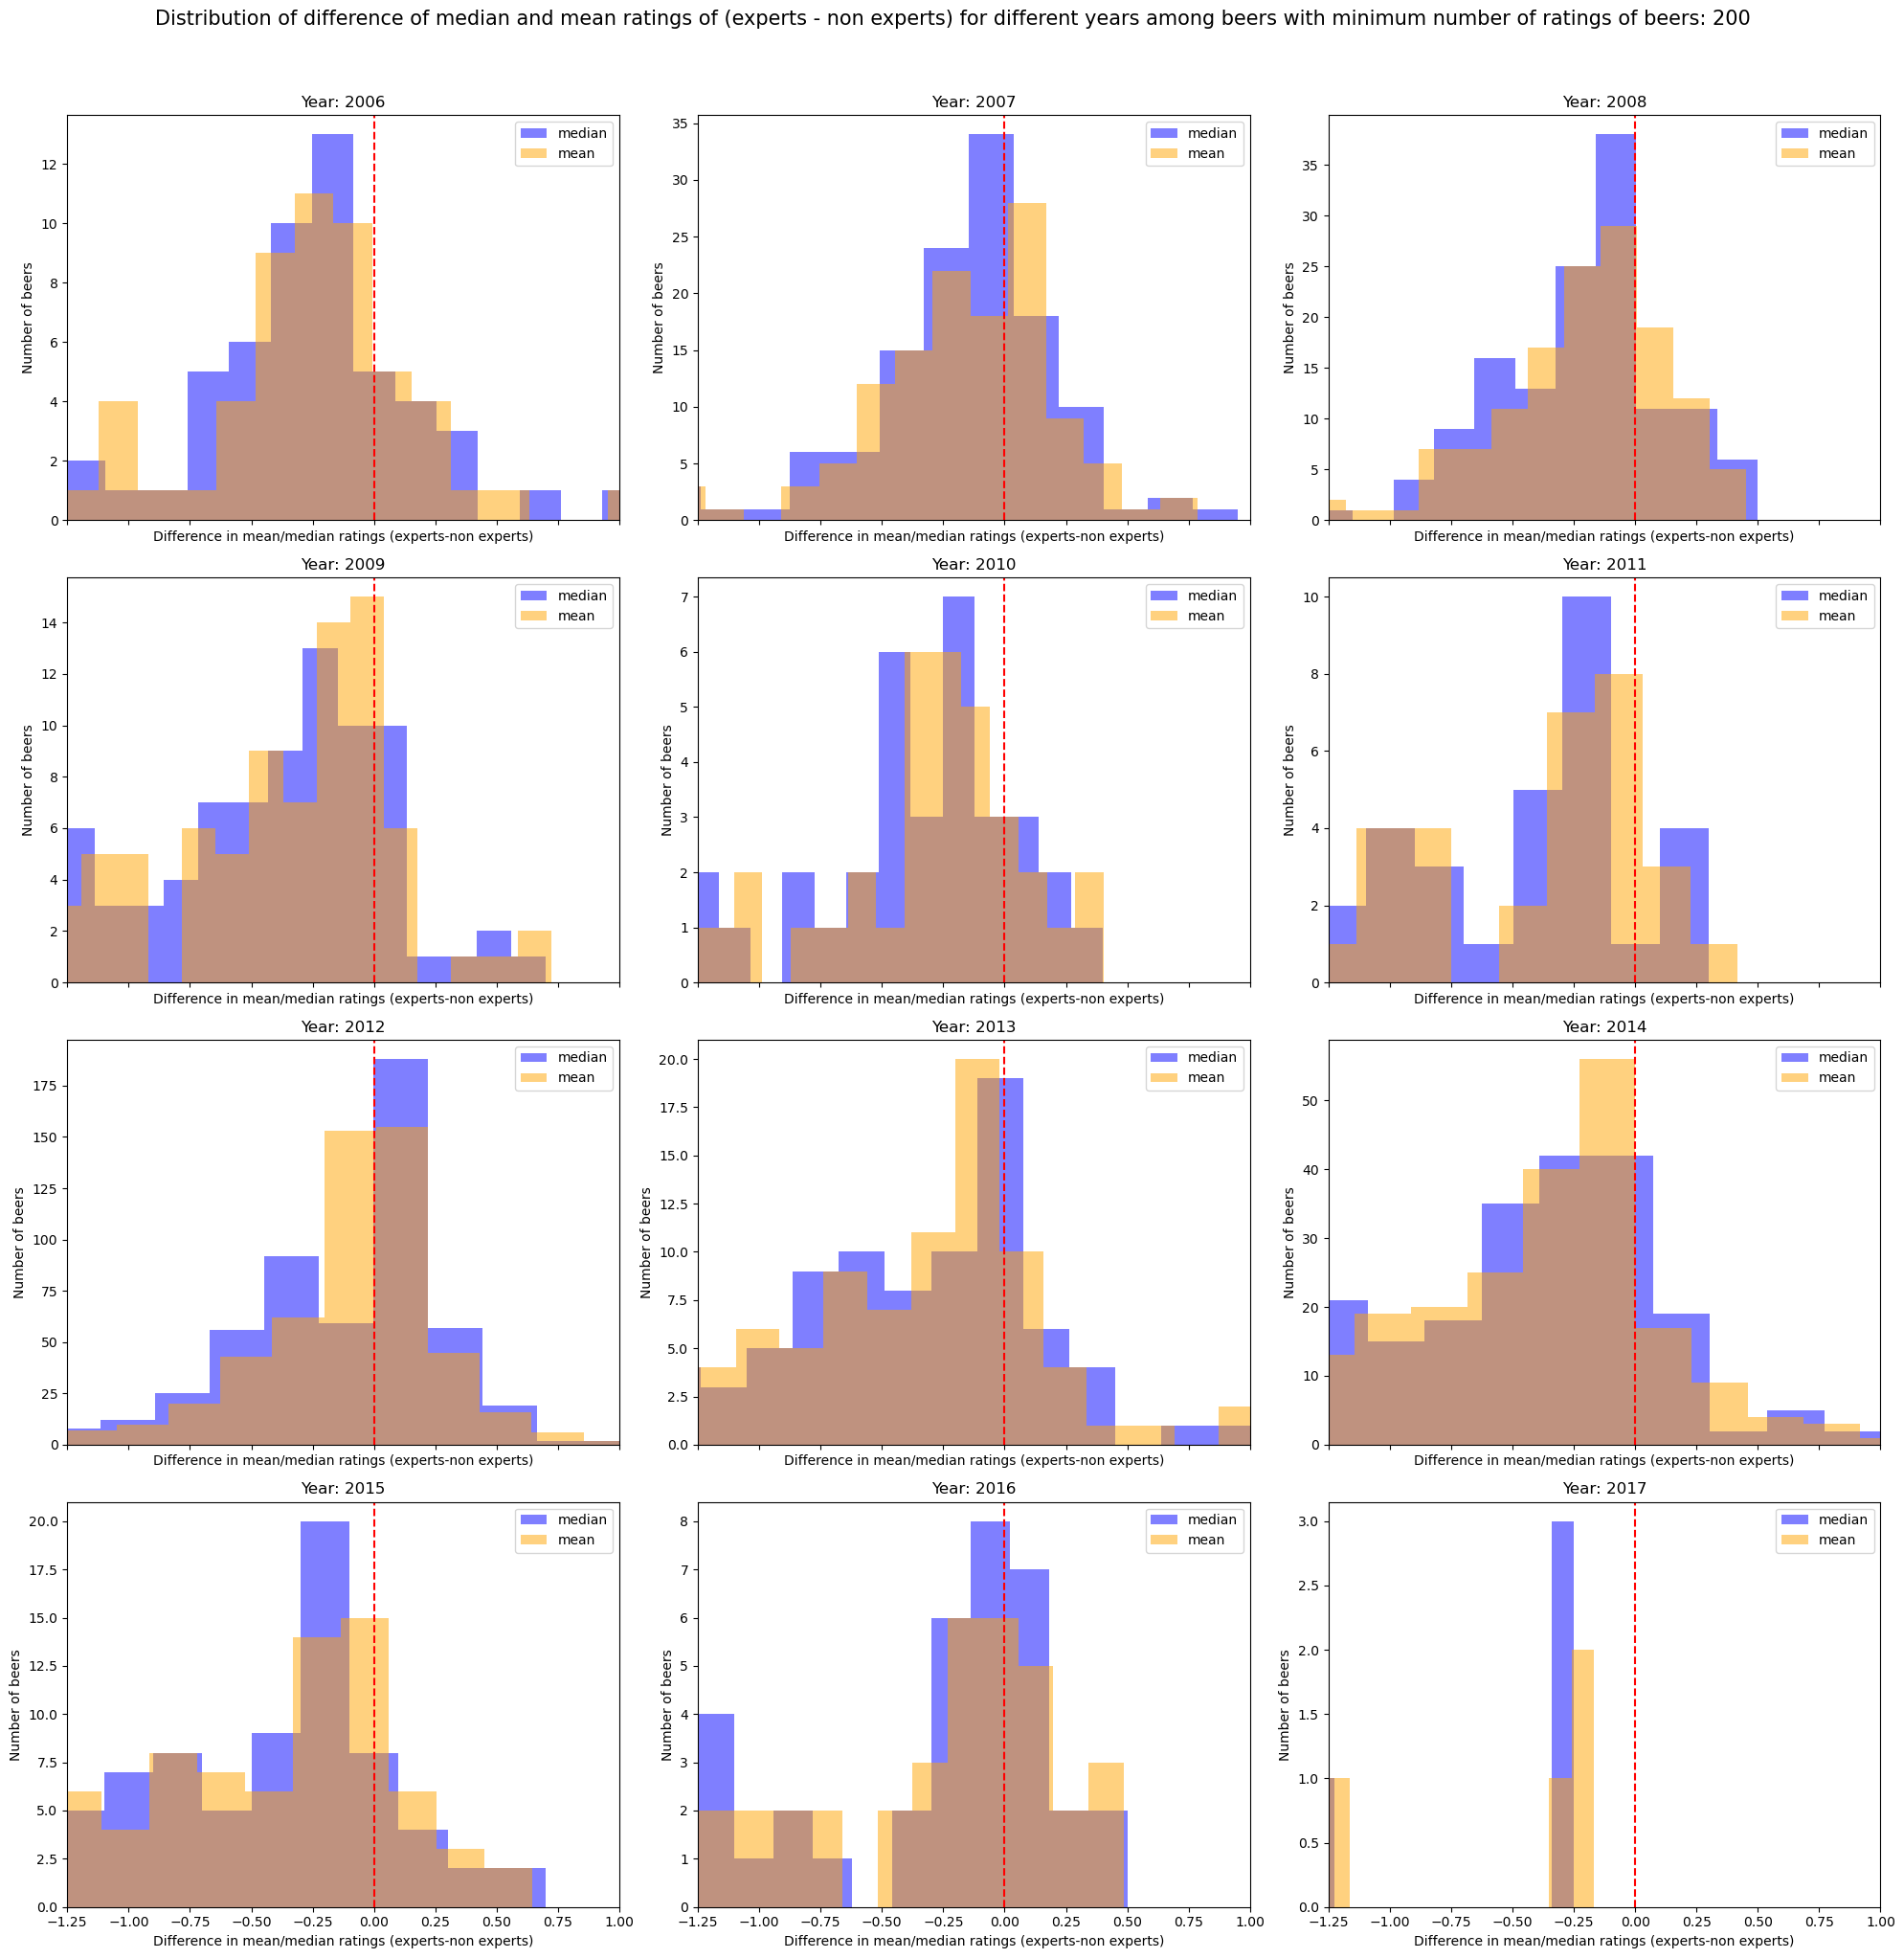

In [69]:
fig,ax=plt.subplots(4,3,sharex=True)
fig.set_size_inches(20,20)
nb_bins=20
min_number_of_ratings=200

for i,YEAR in enumerate(range(2006,2018)):
    print(YEAR)
    difference_ratings_medians_list=[]
    difference_ratings_means_list=[]
    df_ratings_this_year,experts_id=filter_year_and_add_is_expert(df_ratings_merge,YEAR,experts_table)
    beers_with_enough_ratings=df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>min_number_of_ratings].index.values
    df_advocate_ratings_this_year_with_enough_ratings=df_ratings_this_year.loc[df_ratings_this_year["beer_id"].isin(beers_with_enough_ratings)]
    difference_ratings_medians=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("median")
    difference_ratings_means=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("mean")
    
    for beer_id in difference_ratings_medians.index.get_level_values(0).unique():
        if 0 in difference_ratings_medians.loc[beer_id] and 1 in difference_ratings_medians.loc[beer_id]:
            difference_ratings_medians_list.append(difference_ratings_medians.loc[beer_id,1]-difference_ratings_medians.loc[beer_id,0])
            difference_ratings_means_list.append(difference_ratings_means.loc[beer_id,1]-difference_ratings_means.loc[beer_id,0])
            
    ax[i//3,i%3].hist(difference_ratings_medians_list,alpha=0.5,bins=nb_bins,color="b",label="median")
    ax[i//3,i%3].hist(difference_ratings_means_list,alpha=0.5,bins=nb_bins,color="orange",label="mean")
    ax[i//3,i%3].axvline(0,c="r",linestyle="--")
    ax[i//3,i%3].set_xlim(-1.25,1)
    ax[i//3,i%3].set_xlabel("Difference in mean/median ratings (experts-non experts)")
    ax[i//3,i%3].set_ylabel("Number of beers")
    ax[i//3,i%3].set_title("Year: "+str(YEAR))
    ax[i//3,i%3].legend()
fig.suptitle(f"Distribution of difference of median and mean ratings of (experts - non experts) for different years among beers with minimum number of ratings of beers: {min_number_of_ratings}",fontsize=15,y=1.02)
fig.tight_layout()
plt.show()

#### Now analysis beer by beer

In [70]:
YEAR=2016
df_ratings_this_year,experts_id=filter_year_and_add_is_expert(df_ratings_merge,YEAR,experts_table)

c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


In [72]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(20,20)
minimum_number_of_ratings=200
bins=10
for i in range(25):
    beer_id_to_study=np.random.choice(df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>minimum_number_of_ratings].index.values)
    ratings_this_beer=df_ratings_this_year.loc[df_ratings_this_year["beer_id"]==beer_id_to_study]
    ratings_this_beer_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==1]
    ratings_this_beer_non_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==0]
    while len(ratings_this_beer_experts)==0 or len(ratings_this_beer_non_experts)==0:
        beer_id_to_study=np.random.choice(df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>minimum_number_of_ratings].index.values)
        ratings_this_beer=df_ratings_this_year.loc[df_ratings_this_year["beer_id"]==beer_id_to_study]
        ratings_this_beer_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==1]
        ratings_this_beer_non_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==0]

    
    difference_ttest=ttest_ind(ratings_this_beer_experts["rating"],ratings_this_beer_non_experts["rating"])
    ax[i//5,i%5].hist(ratings_this_beer_experts["rating"],bins=bins,alpha=0.5,label="Experts",color="b")
    ax[i//5,i%5].hist(ratings_this_beer_non_experts["rating"],bins=bins,alpha=0.5,label="Non experts",color="orange")
    ax[i//5,i%5].axvline(ratings_this_beer_experts["rating"].mean(),c="b",linestyle="--")
    ax[i//5,i%5].axvline(ratings_this_beer_non_experts["rating"].mean(),c="orange",linestyle="--")
    
    ax[i//5,i%5].set_xticks(np.arange(0,6,1),labels=np.arange(0,6,1))
    ax[i//5,i%5].set_xlabel("Rating")
    ax[i//5,i%5].set_ylabel("Number of ratings")
    ax[i//5, i%5].set_title(f"Beer id: {beer_id_to_study} Nbr of ratings: {ratings_this_beer.shape[0]}\n ttest diff stat: {np.round(difference_ttest[0], 2)}, pvalue: {np.round(difference_ttest[1], 2)}")
for i in range(5):
    ax[i,0].legend()
fig.suptitle(f"Distribution of some ratings for experts and non experts for year {YEAR}",y=1.01,fontsize=20)
fig.tight_layout()
plt.show()

#### Beers with significant diff:

In [ ]:
relaunch_search=False
if relaunch_search:
    beer_id_with_significant_difference=[]
    minimum_number_of_ratings=10
    for beer_id_to_study in df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>minimum_number_of_ratings].index.values:
        ratings_this_beer=df_ratings_this_year.loc[df_ratings_this_year["beer_id"]==beer_id_to_study]
        ratings_this_beer_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==1]
        ratings_this_beer_non_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==0]
        
        difference_ttest=ttest_ind(ratings_this_beer_experts["rating"],ratings_this_beer_non_experts["rating"])
        if difference_ttest[1]<0.05:
            beer_id_with_significant_difference.append(beer_id_to_study)
else:
    with open("intermediate_files/beer_id_with_significant_difference_2015_0.95.pkl","rb") as f:
        beer_id_with_significant_difference=pickle.load(f)

In [ ]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(20,20)

bins=10
for i in range(25):
    beer_id_to_study=np.random.choice(beer_id_with_significant_difference)
    ratings_this_beer=df_ratings_this_year.loc[df_ratings_this_year["beer_id"]==beer_id_to_study]
    ratings_this_beer_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==1]
    ratings_this_beer_non_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==0]
    
    difference_ttest=ttest_ind(ratings_this_beer_experts["rating"],ratings_this_beer_non_experts["rating"])
    ax[i//5,i%5].hist(ratings_this_beer_experts["rating"],bins=bins,alpha=0.5,label="Experts",color="b")
    ax[i//5,i%5].axvline(ratings_this_beer_experts["rating"].mean(),c="b",linestyle="--")
    ax[i//5,i%5].axvline(ratings_this_beer_non_experts["rating"].mean(),c="orange",linestyle="--")
    ax[i//5,i%5].hist(ratings_this_beer_non_experts["rating"],bins=bins,alpha=0.5,label="Non experts",color="orange")
    
    ax[i//5,i%5].set_xticks(np.arange(0,6,1),labels=np.arange(0,6,1))
    ax[i//5,i%5].set_xlabel("Rating")
    ax[i//5,i%5].set_ylabel("Number of ratings")
    ax[i//5, i%5].set_title(f"Beer id: {beer_id_to_study} Nbr of ratings: {ratings_this_beer.shape[0]}\n ttest diff stat: {np.round(difference_ttest[0], 2)}, pvalue: {np.round(difference_ttest[1], 4)}")
for i in range(5):
    ax[i,0].legend()
fig.suptitle(f"Distribution of some ratings for experts and non experts for year {YEAR}",y=1.01,fontsize=20)
fig.tight_layout()
plt.show()

### Ratings at the beginning of a beer

In [150]:
experts_table=compute_experts_table(df_ratings_merge,quantile_score_expert=0.995)
experts_table=experts_table[0]

ok


In [158]:

experts_dict = {}
for year in range(1996, 2018):
    experts_dict[year] = experts_table.loc[(experts_table["year"] == year) & (experts_table["is_expert"] == 1)].user_id.values.tolist()
print(experts_dict)


{1996: [], 1997: [], 1998: ['beeradvocate.1'], 1999: ['beeradvocate.1'], 2000: [195], 2001: [195, 517, 727, 954, 1045, 1880], 2002: [195, 727, 954, 1880, 2640, 2778, 3206, 3280, 3677, 3847, 3947, 'beernut7.138', 'bighuge.188', 'gusler.811', 'jason.3', 'marc77.57'], 2003: [195, 1522, 1782, 1786, 1880, 2640, 2778, 3206, 3598, 3677, 3722, 3806, 3847, 4383, 5328, 5931, 6116, 6162, 6843, 7443, 'atlagerheads.1671', 'beerguy101.137', 'feloniousmonk.1022', 'gusler.811', 'nerofiddled.526'], 2004: [195, 619, 832, 956, 1782, 1786, 1880, 2463, 2640, 2778, 2876, 3206, 3280, 3352, 3722, 4379, 4383, 5011, 5099, 5328, 5792, 6162, 6337, 6517, 6785, 6832, 6843, 7180, 7204, 7443, 7806, 8263, 8858, 9058, 11244, 'feloniousmonk.1022'], 2005: [195, 832, 956, 1782, 1786, 2640, 2778, 3206, 3352, 3722, 4383, 4919, 4979, 5001, 5011, 5328, 5628, 5792, 5855, 6146, 6337, 6785, 6832, 6843, 7204, 7443, 8017, 8089, 8858, 9058, 9334, 9509, 9953, 10039, 10185, 10233, 10260, 10280, 10361, 11026, 11244, 11473, 11840, 1336

In [159]:
len(experts_dict[2015])

764

In [22]:
beer_id_to_study=df_ratings_merge.sample(1)["beer_id"].values[0]

In [163]:
def make_analysis_one_beer(beer_id_to_study):
    ratings_this_beer=df_ratings_merge.loc[df_ratings_merge["beer_id"]==beer_id_to_study]
    ratings_this_beer.sort_values(by="date",inplace=True)
    ratings_this_beer["is_expert"]=ratings_this_beer[["user_id","year"]].apply(lambda x: 1 if x["user_id"] in experts_dict[x["year"]] else 0,axis=1)
    # group ratings by date and count the number of ratings for each date
    ratings_by_date = ratings_this_beer.groupby(['date','is_expert']).size().reset_index(name='count')


    # calculate the cumulative sum of the ratings
    ratings_by_date['cumulative_count'] = ratings_by_date['count'].cumsum()

    fig,ax=plt.subplots(1,2)
    fig.set_size_inches(20,7)
    # plot the evolution of the cumulative number of ratings over time
    n=0
    old_date=ratings_by_date["date"].values[0]
    for i,rating in ratings_by_date.iterrows():
        if rating["is_expert"]==1:
            c="b"
            markersize=2
        else:
            c="orange"
            markersize=1
        ax[0].plot([old_date,rating["date"]],[n,rating["cumulative_count"]],marker="o",c=c,markersize=markersize)
        n=rating["cumulative_count"]
        old_date=rating["date"]
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Cumulative number of ratings')
    last_year=ratings_this_beer["year"].values[-1]
    first_year=ratings_this_beer["year"].values[0]
    xticks = np.array([pd.to_datetime(str(year), format='%Y') for year in range(first_year,last_year+1)])
    if len(xticks)>5:
        indexs_x_ticks=np.arange(0,len(xticks),len(xticks)//5)
        indexs_x_ticks=np.floor(indexs_x_ticks).astype(int)
        ax[0].set_xticks(xticks[indexs_x_ticks])
    else:
        ax[0].set_xticks(xticks)
    ratings_this_beer.groupby("year")["rating"].agg("mean").plot(ax=ax[1],marker="o",c="b",markersize=2)
    ax[1].set_xlabel('Year')
    ax[1].set_ylabel('Mean rating of the year')
    fig.suptitle(f'Evolution of cumulative number of ratings over time for beer {beer_id_to_study}')
    fig.tight_layout()
    plt.show()

C:\Users\Alexi\AppData\Local\Temp\ipykernel_17012\222656000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_this_beer.sort_values(by="date",inplace=True)
C:\Users\Alexi\AppData\Local\Temp\ipykernel_17012\222656000.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_this_beer["is_expert"]=ratings_this_beer[["user_id","year"]].apply(lambda x: 1 if x["user_id"] in experts_dict[x["year"]] else 0,axis=1)


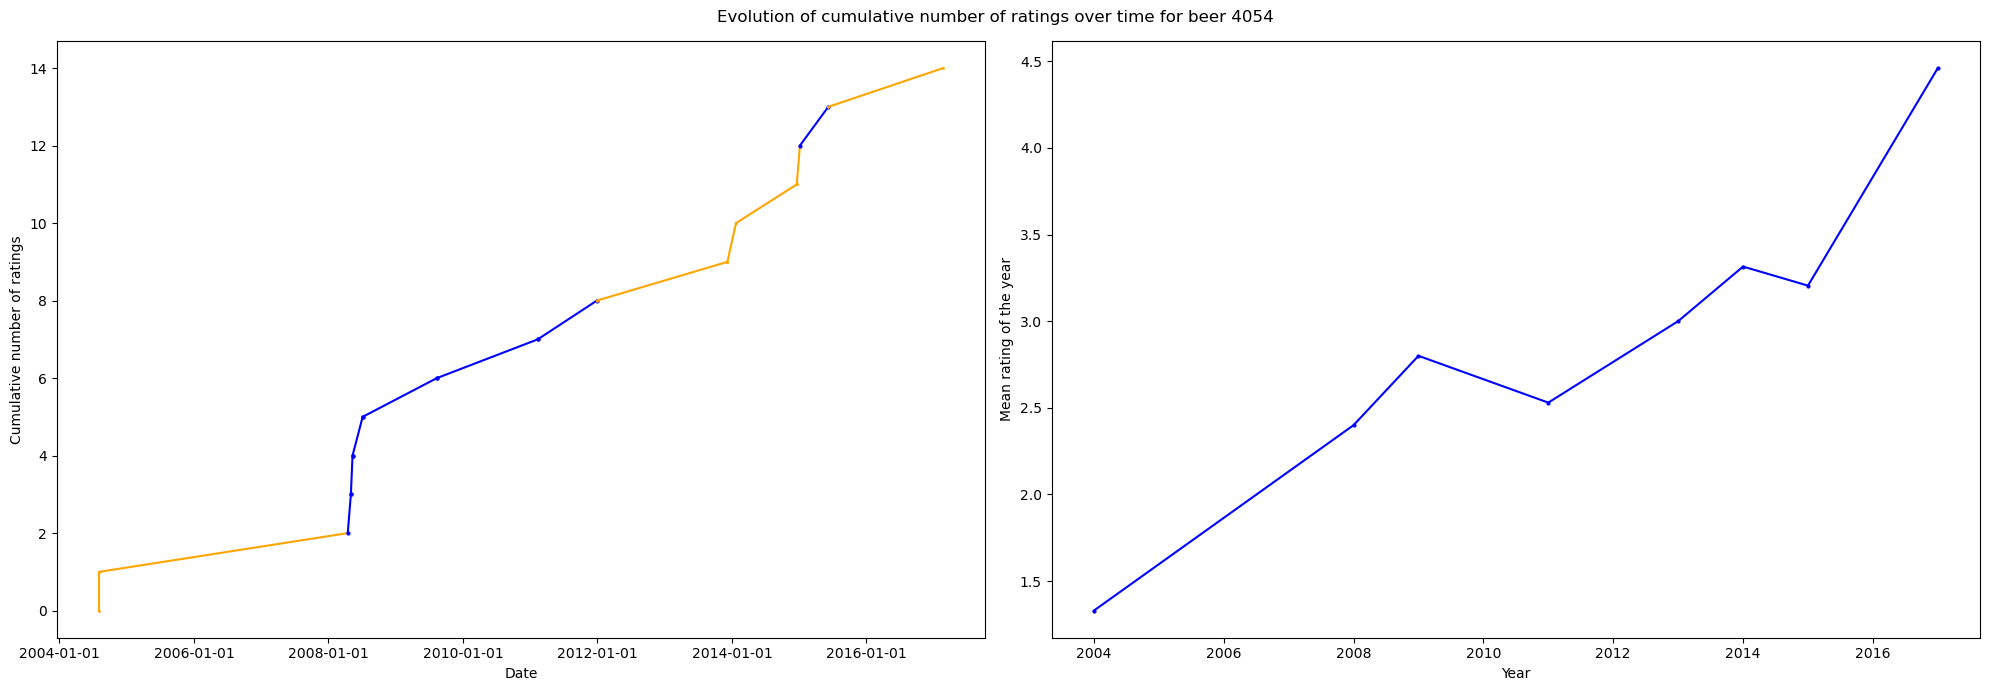

In [166]:
make_analysis_one_beer("4054")

C:\Users\Alexi\AppData\Local\Temp\ipykernel_17012\141928107.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_this_beer.sort_values(by="date",inplace=True)
C:\Users\Alexi\AppData\Local\Temp\ipykernel_17012\141928107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_this_beer["is_expert"]=ratings_this_beer[["user_id","year"]].apply(lambda x: 1 if x["user_id"] in experts_dict[x["year"]] else 0,axis=1)
C:\Users\Alexi\AppData\Local\Temp\ipykernel_17012\141928107.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

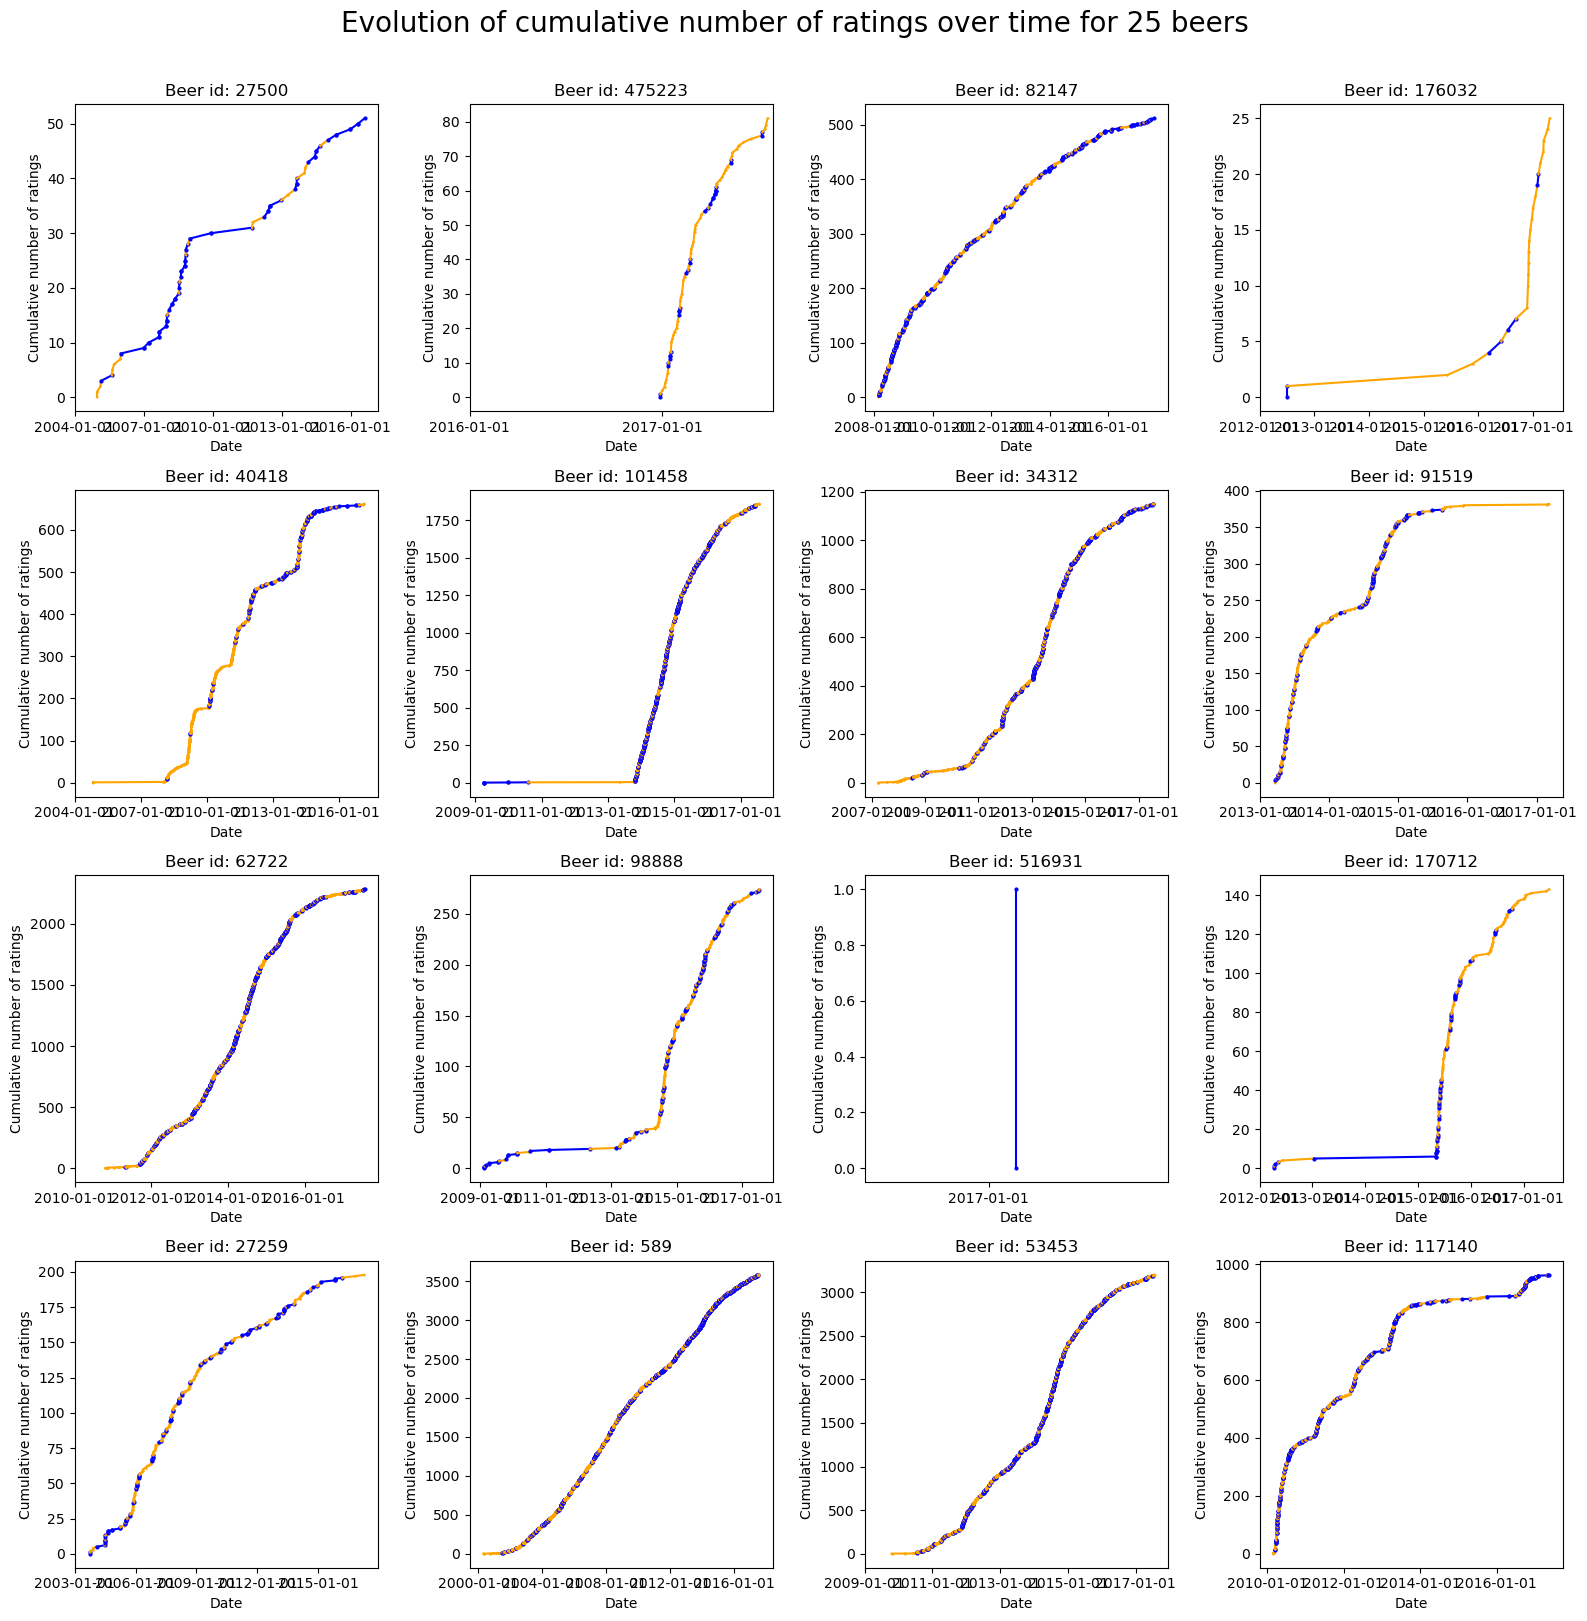

In [162]:
n_rows=4

fig,ax=plt.subplots(n_rows,n_rows)
fig.set_size_inches(4*n_rows,4*n_rows)
for k in range(n_rows*n_rows):
    if k==0:
        beer_id_to_study="27500"
    else:
        beer_id_to_study=df_ratings_merge.sample(1)["beer_id"].values[0]
    ratings_this_beer=df_ratings_merge.loc[df_ratings_merge["beer_id"]==beer_id_to_study]
    ratings_this_beer.sort_values(by="date",inplace=True)
    ratings_this_beer["is_expert"]=ratings_this_beer[["user_id","year"]].apply(lambda x: 1 if x["user_id"] in experts_dict[x["year"]] else 0,axis=1)
    # group ratings by date and count the number of ratings for each date
    ratings_by_date = ratings_this_beer.groupby(['date','is_expert']).size().reset_index(name='count')


    # calculate the cumulative sum of the ratings
    ratings_by_date['cumulative_count'] = ratings_by_date['count'].cumsum()

    # plot the evolution of the cumulative number of ratings over time
    n=0
    old_date=ratings_by_date["date"].values[0]
    for i,rating in ratings_by_date.iterrows():
        if rating["is_expert"]==1:
            c="b"
            markersize=2
        else:
            c="orange"
            markersize=0.5
        ax[k//n_rows,k%n_rows].plot([old_date,rating["date"]],[n,rating["cumulative_count"]],marker="o",c=c,markersize=markersize)
        n=rating["cumulative_count"]
        old_date=rating["date"]
    ax[k//n_rows,k%n_rows].set_xlabel('Date')
    ax[k//n_rows,k%n_rows].set_ylabel('Cumulative number of ratings')
    last_year=ratings_this_beer["year"].values[-1]
    first_year=ratings_this_beer["year"].values[0]
    xticks = np.array([pd.to_datetime(str(year), format='%Y') for year in range(first_year,last_year+1)])
    if len(xticks)>4:
        indexs_x_ticks=np.arange(0,len(xticks),len(xticks)//4)
        indexs_x_ticks=np.floor(indexs_x_ticks).astype(int)
        ax[k//n_rows,k%n_rows].set_xticks(xticks[indexs_x_ticks])
    else:
        ax[k//n_rows,k%n_rows].set_xticks(xticks)
    ax[k//n_rows,k%n_rows].set_title(f'Beer id: {beer_id_to_study}')
fig.suptitle(f'Evolution of cumulative number of ratings over time for 25 beers',y=1.01,fontsize=20)
fig.tight_layout()
plt.show()